In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet  # or from fbprophet import Prophet

In [2]:
!pip install prophet

In [3]:
from prophet import Prophet
import pandas as pd

# Load the mock dataset
df = pd.read_csv("mock_warehouse_usage.csv", parse_dates=["date"])

In [4]:

# List of unique items
item_ids = df["item_id"].unique()

# Forecast storage
forecast_results = []

for item_id in item_ids:
    item_df = df[df["item_id"] == item_id]
    
    # Weekly aggregation
    weekly = item_df.groupby(pd.Grouper(key="date", freq="W"))["quantity_used"].sum().reset_index()
    weekly.columns = ["ds", "y"]

    if len(weekly) < 30:
        continue  # skip short histories

    model = Prophet()
    model.fit(weekly)

    future = model.make_future_dataframe(periods=12, freq="W")
    forecast = model.predict(future)
    
    forecast["item_id"] = item_id
    forecast_results.append(forecast[["ds", "item_id", "yhat", "yhat_lower", "yhat_upper"]])

# Combine forecasts
all_forecasts = pd.concat(forecast_results)
print(all_forecasts)

11:23:36 - cmdstanpy - INFO - Chain [1] start processing
11:23:37 - cmdstanpy - INFO - Chain [1] done processing
11:23:37 - cmdstanpy - INFO - Chain [1] start processing
11:23:37 - cmdstanpy - INFO - Chain [1] done processing
11:23:37 - cmdstanpy - INFO - Chain [1] start processing
11:23:37 - cmdstanpy - INFO - Chain [1] done processing
11:23:37 - cmdstanpy - INFO - Chain [1] start processing
11:23:38 - cmdstanpy - INFO - Chain [1] done processing
11:23:38 - cmdstanpy - INFO - Chain [1] start processing
11:23:38 - cmdstanpy - INFO - Chain [1] done processing
11:23:38 - cmdstanpy - INFO - Chain [1] start processing
11:23:38 - cmdstanpy - INFO - Chain [1] done processing
11:23:38 - cmdstanpy - INFO - Chain [1] start processing
11:23:39 - cmdstanpy - INFO - Chain [1] done processing
11:23:39 - cmdstanpy - INFO - Chain [1] start processing
11:23:39 - cmdstanpy - INFO - Chain [1] done processing
11:23:39 - cmdstanpy - INFO - Chain [1] start processing
11:23:39 - cmdstanpy - INFO - Chain [1]

            ds    item_id       yhat  yhat_lower  yhat_upper
0   2023-01-01  ITEM_0001  32.591352   23.326949   41.587151
1   2023-01-08  ITEM_0001  33.720347   24.251374   44.250422
2   2023-01-15  ITEM_0001  38.342510   27.881065   47.949309
3   2023-01-22  ITEM_0001  42.397555   33.031788   52.244559
4   2023-01-29  ITEM_0001  43.900216   33.819655   53.233661
..         ...        ...        ...         ...         ...
113 2025-03-02  ITEM_0010  54.841058   45.782027   63.988360
114 2025-03-09  ITEM_0010  55.032251   46.472882   64.390722
115 2025-03-16  ITEM_0010  55.073742   46.601024   64.027459
116 2025-03-23  ITEM_0010  56.348457   47.995349   65.498678
117 2025-03-30  ITEM_0010  58.546101   49.218934   67.022411

[1180 rows x 5 columns]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7310 entries, 0 to 7309
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           7310 non-null   datetime64[ns]
 1   item_id        7310 non-null   object        
 2   quantity_used  7310 non-null   int64         
 3   project_type   7310 non-null   object        
 4   region         7310 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 285.7+ KB


In [6]:
df.head()

,date,item_id,quantity_used,project_type,region
0,2023-01-01,ITEM_0001,5,Network,West
1,2023-01-02,ITEM_0001,8,Broadcast,North
2,2023-01-03,ITEM_0001,7,DigitalSignage,West
3,2023-01-04,ITEM_0001,9,DigitalSignage,North
4,2023-01-05,ITEM_0001,5,DigitalSignage,North


In [7]:
import os

output_dir = "forecast_summaries"
os.makedirs(output_dir, exist_ok=True)

11:23:40 - cmdstanpy - INFO - Chain [1] start processing
11:23:40 - cmdstanpy - INFO - Chain [1] done processing



Forecast summary for ITEM_0001:
            ds       yhat  yhat_lower  yhat_upper
113 2025-03-02  61.542821   51.500659   71.081526
114 2025-03-09  60.788655   50.592257   69.841635
115 2025-03-16  60.822225   50.958502   70.288180
116 2025-03-23  63.132888   53.704534   73.252037
117 2025-03-30  65.950933   56.381471   75.562554


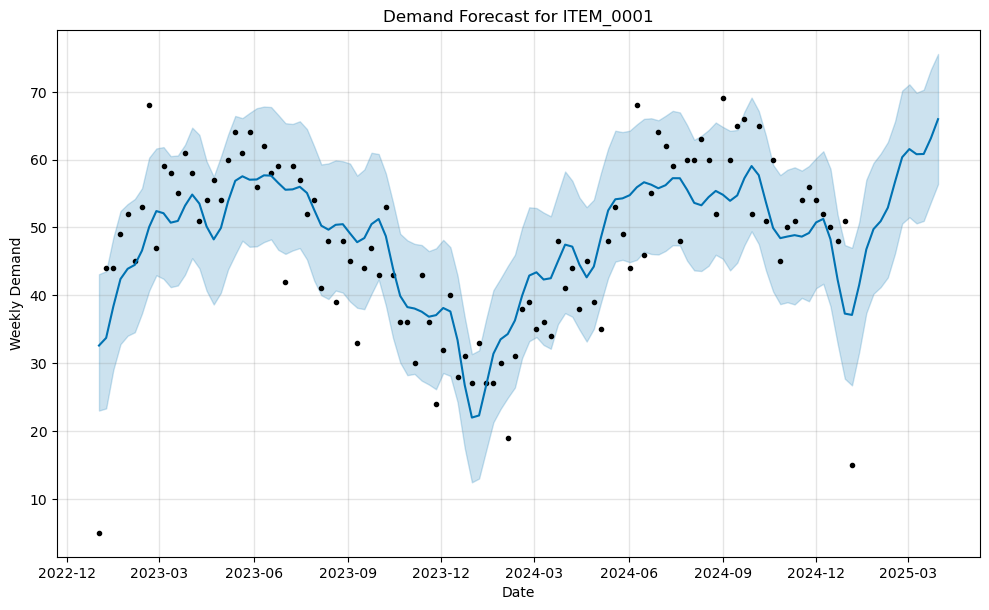

11:23:41 - cmdstanpy - INFO - Chain [1] start processing
11:23:41 - cmdstanpy - INFO - Chain [1] done processing



Forecast summary for ITEM_0002:
            ds       yhat  yhat_lower  yhat_upper
113 2025-03-02  45.193740   36.901120   53.120844
114 2025-03-09  43.901013   36.165764   52.208615
115 2025-03-16  43.787452   35.752004   51.962958
116 2025-03-23  46.457919   38.888805   54.068966
117 2025-03-30  50.744894   42.888716   58.949395


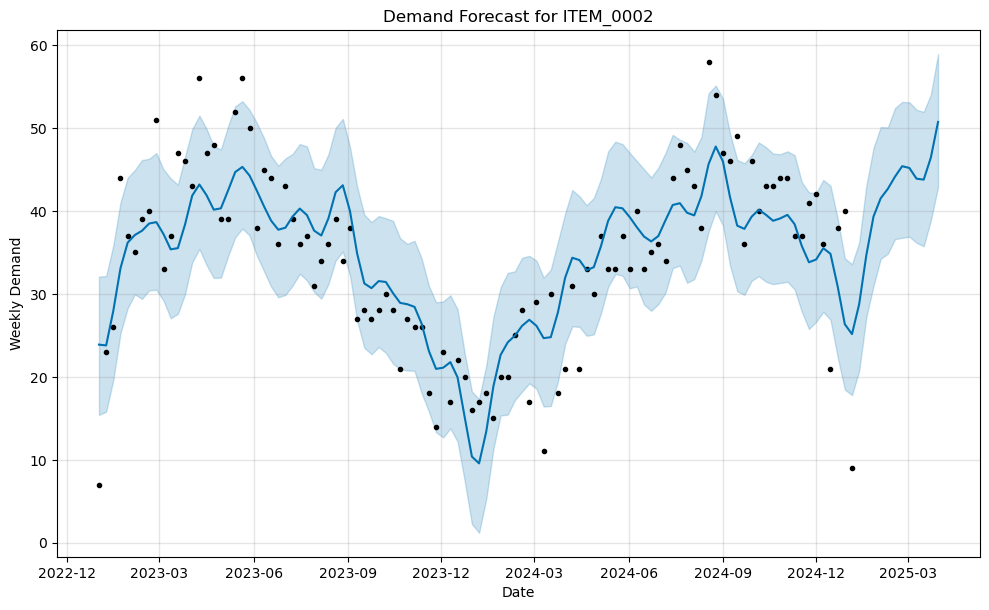

11:23:41 - cmdstanpy - INFO - Chain [1] start processing
11:23:42 - cmdstanpy - INFO - Chain [1] done processing



Forecast summary for ITEM_0003:
            ds       yhat  yhat_lower  yhat_upper
113 2025-03-02  60.564820   51.553961   69.309121
114 2025-03-09  62.430374   53.309840   71.552908
115 2025-03-16  63.583780   54.976178   72.342166
116 2025-03-23  64.359279   55.661126   73.530311
117 2025-03-30  64.898501   56.755487   72.859731


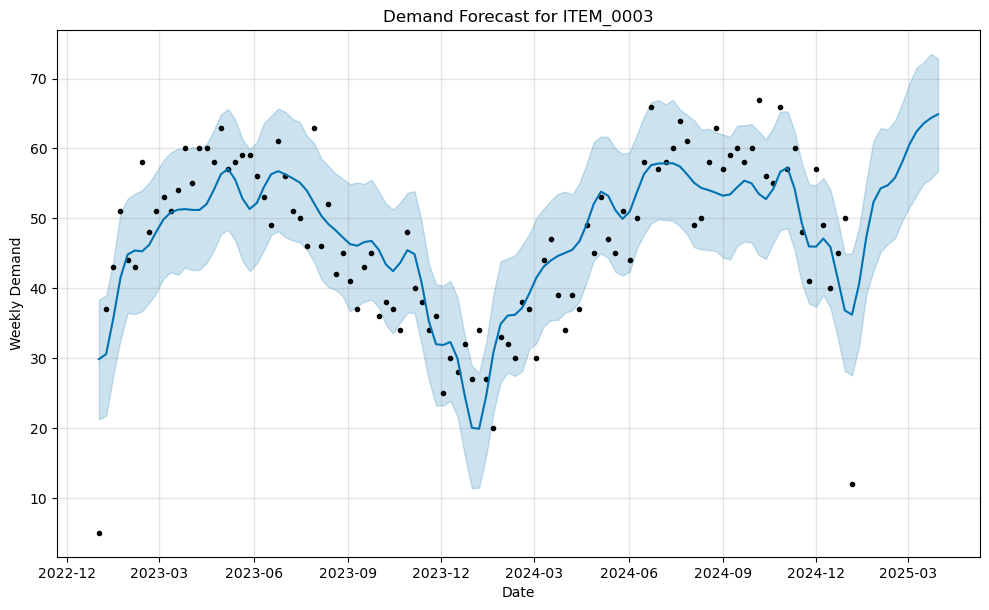

11:23:42 - cmdstanpy - INFO - Chain [1] start processing
11:23:42 - cmdstanpy - INFO - Chain [1] done processing



Forecast summary for ITEM_0004:
            ds       yhat  yhat_lower  yhat_upper
113 2025-03-02  12.398058    5.645486   19.090982
114 2025-03-09  12.285364    5.971355   18.932467
115 2025-03-16  11.909904    5.168778   18.852113
116 2025-03-23  11.627078    5.187253   18.131984
117 2025-03-30  11.699486    5.266684   18.506181


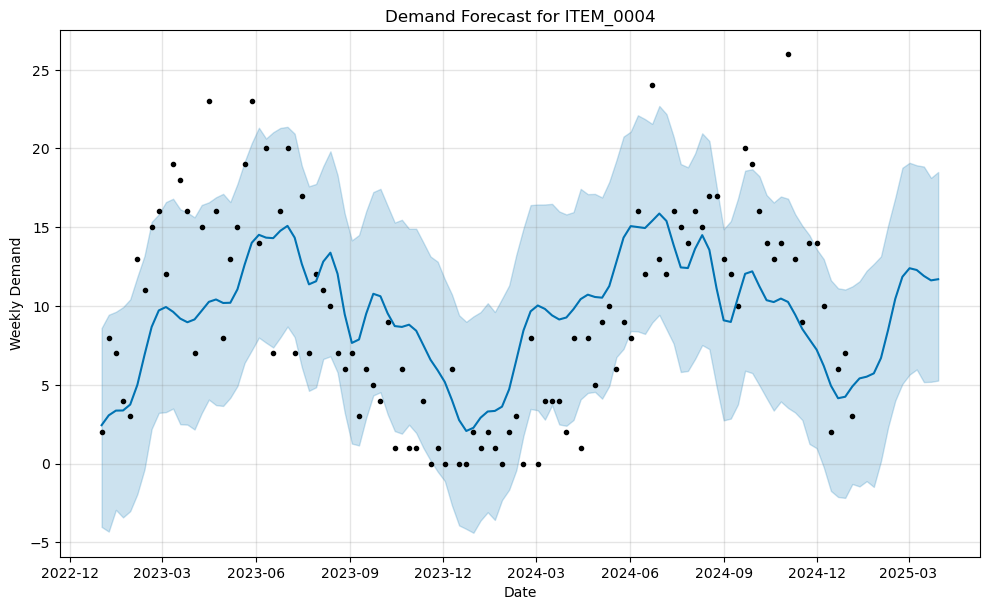

11:23:43 - cmdstanpy - INFO - Chain [1] start processing
11:23:43 - cmdstanpy - INFO - Chain [1] done processing



Forecast summary for ITEM_0005:
            ds      yhat  yhat_lower  yhat_upper
113 2025-03-02  8.578060    0.951279   16.754201
114 2025-03-09  8.229505    1.532653   15.744525
115 2025-03-16  7.880258    0.080403   15.548689
116 2025-03-23  7.858323    0.078434   15.565750
117 2025-03-30  9.019238    1.710210   16.788951


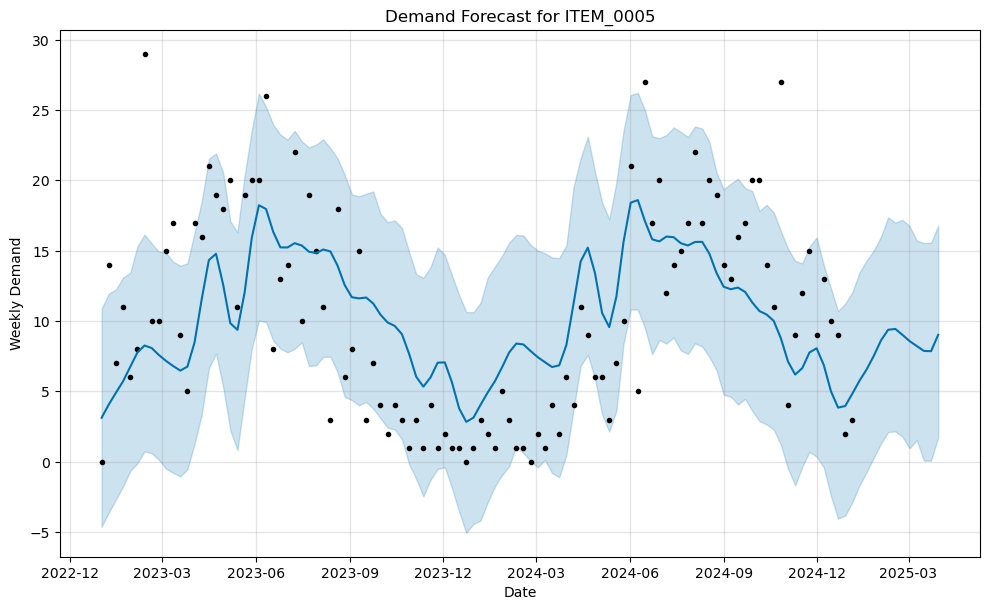

11:23:43 - cmdstanpy - INFO - Chain [1] start processing
11:23:44 - cmdstanpy - INFO - Chain [1] done processing



Forecast summary for ITEM_0006:
            ds       yhat  yhat_lower  yhat_upper
113 2025-03-02   9.745910    1.574762   17.638393
114 2025-03-09   9.799521    2.216696   16.888213
115 2025-03-16   9.944883    2.259219   17.741507
116 2025-03-23  11.190156    3.610276   18.722085
117 2025-03-30  13.517248    5.646151   21.079713


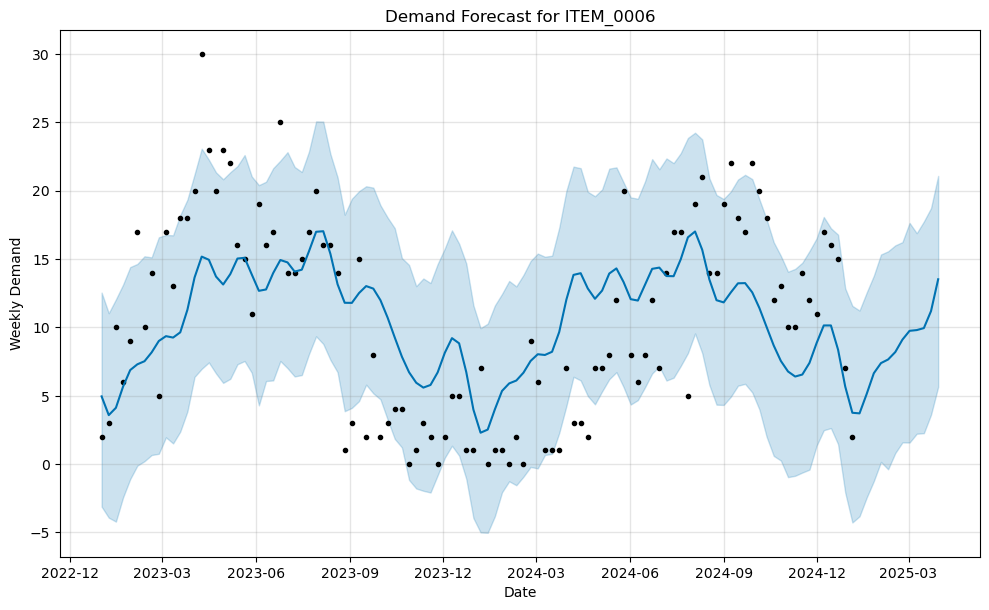

11:23:44 - cmdstanpy - INFO - Chain [1] start processing
11:23:44 - cmdstanpy - INFO - Chain [1] done processing



Forecast summary for ITEM_0007:
            ds       yhat  yhat_lower  yhat_upper
113 2025-03-02  21.863955   15.763421   28.064793
114 2025-03-09  23.812186   17.912837   30.007613
115 2025-03-16  24.792589   18.630985   30.925593
116 2025-03-23  25.254485   18.994694   31.590025
117 2025-03-30  25.935605   19.625182   32.088258


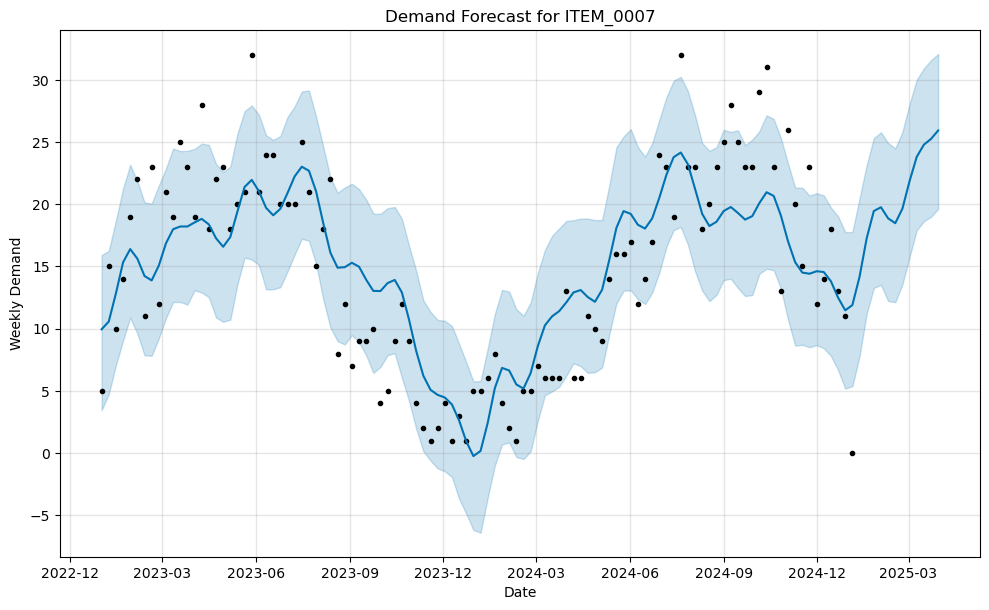

11:23:45 - cmdstanpy - INFO - Chain [1] start processing
11:23:45 - cmdstanpy - INFO - Chain [1] done processing



Forecast summary for ITEM_0008:
            ds       yhat  yhat_lower  yhat_upper
113 2025-03-02  27.245698   19.974968   34.798619
114 2025-03-09  29.199729   21.759088   36.606026
115 2025-03-16  30.758458   23.575817   37.641849
116 2025-03-23  31.789762   24.362620   39.260107
117 2025-03-30  32.177984   24.546638   39.734437


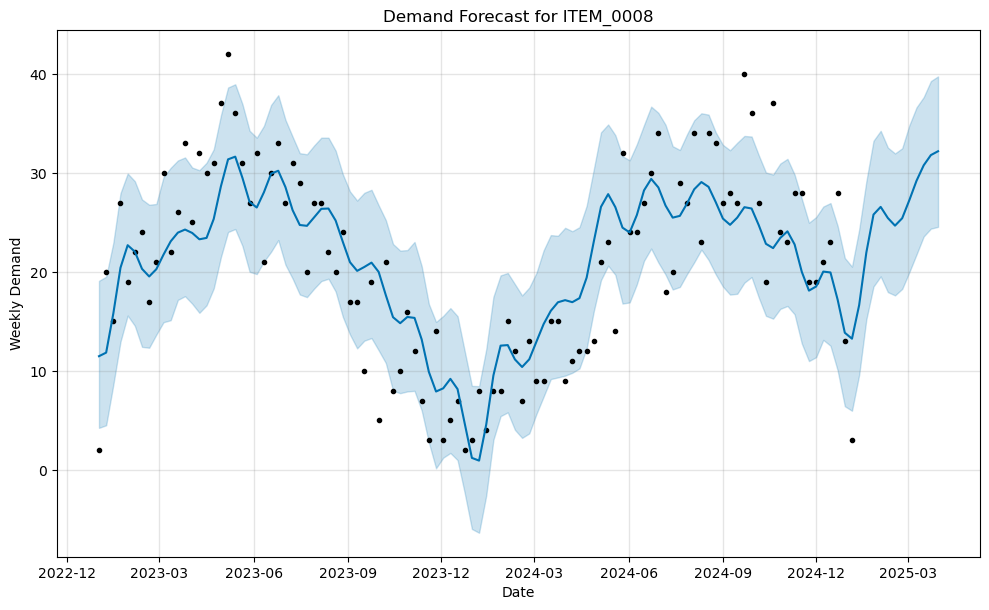

11:23:45 - cmdstanpy - INFO - Chain [1] start processing
11:23:45 - cmdstanpy - INFO - Chain [1] done processing



Forecast summary for ITEM_0009:
            ds       yhat  yhat_lower  yhat_upper
113 2025-03-02  56.346448   46.388478   66.470353
114 2025-03-09  58.360759   48.946921   68.128538
115 2025-03-16  60.905347   50.979881   70.723622
116 2025-03-23  64.299676   54.142948   74.171833
117 2025-03-30  66.626989   57.093673   75.453502


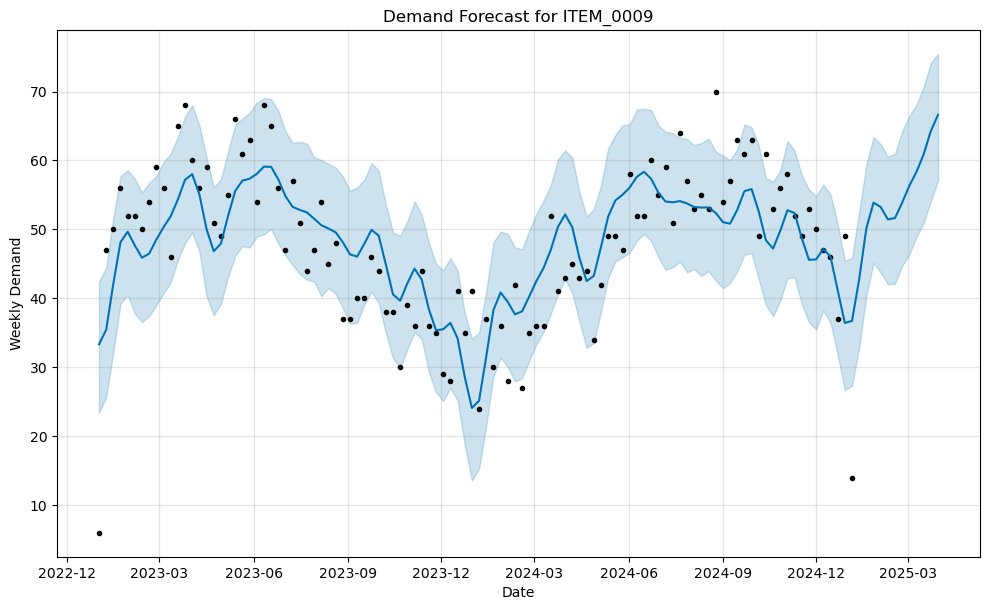

11:23:46 - cmdstanpy - INFO - Chain [1] start processing
11:23:46 - cmdstanpy - INFO - Chain [1] done processing



Forecast summary for ITEM_0010:
            ds       yhat  yhat_lower  yhat_upper
113 2025-03-02  54.841058   45.712458   63.724431
114 2025-03-09  55.032251   46.368475   64.140250
115 2025-03-16  55.073742   45.620007   64.715065
116 2025-03-23  56.348457   46.634384   65.512305
117 2025-03-30  58.546101   48.655487   67.671206


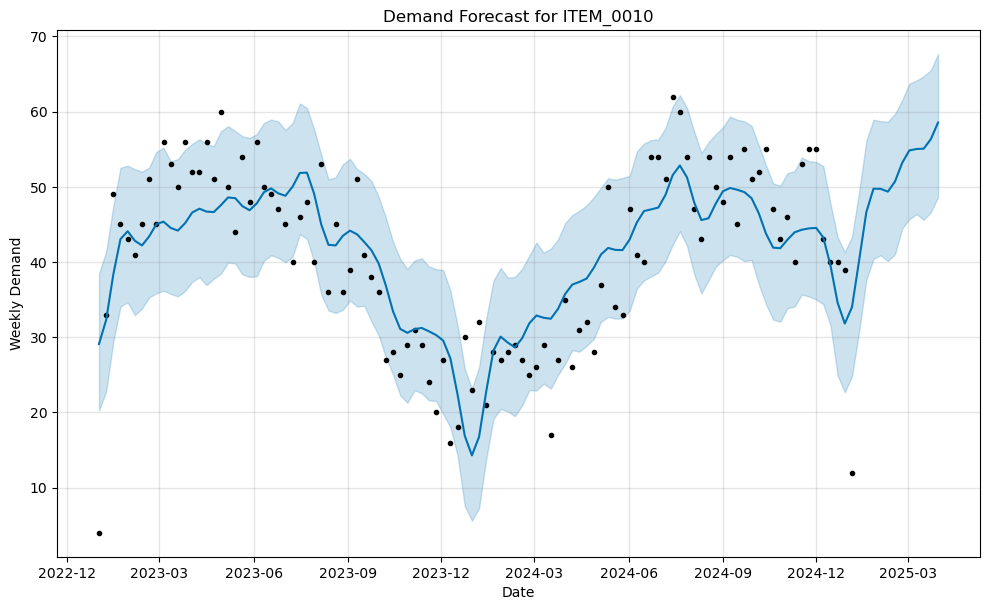

In [8]:
# Load your data
df = pd.read_csv("mock_warehouse_usage.csv", parse_dates=["date"])

item_ids = df["item_id"].unique()

for item_id in item_ids:
    item_df = df[df["item_id"] == item_id]

    # Aggregate to weekly data
    weekly = item_df.groupby(pd.Grouper(key="date", freq="W"))["quantity_used"].sum().reset_index()
    weekly.columns = ["ds", "y"]

    if len(weekly) < 30:
        print(f"Skipping {item_id} due to insufficient data")
        continue

    model = Prophet()
    model.fit(weekly)

    # Forecast 12 weeks ahead (adjust periods as you want)
    future = model.make_future_dataframe(periods=12, freq="W")
    forecast = model.predict(future)

    # Inside your loop after forecasting each item
    summary = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(12)
    summary["item_id"] = item_id

    # Round to 1 decimal place
    summary = summary.round({"yhat": 1, "yhat_lower": 1, "yhat_upper": 1})

    csv_path = os.path.join(output_dir, f"{item_id}_forecast_summary.csv")
    summary.to_csv(csv_path, index=False)

    # Print forecast summary (last 5 predicted weeks)
    print(f"\nForecast summary for {item_id}:")
    print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail())

    # Plot forecast with historical data
    fig = model.plot(forecast)
    plt.title(f"Demand Forecast for {item_id}")
    plt.xlabel("Date")
    plt.ylabel("Weekly Demand")
    plt.show()